In [1]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
!gdown 1qtwJuEKrHXc0UtwwTS4ANzRP9qQvU3IY
!gdown 1pnCbkmvpHkPM1D3vobV-_99klYYuWMB5
!gdown 1jkvSGZHlthut9q_tj0l7nLyGwb0XRDgK
!gdown 194Mih6ykabq04Uxb3sksJOWFRbXmeW0q
!gdown 1Df_5gMElgzwbiXYejf1y5iPqRqd4W2jK
!gdown 1XgCLxTvY5S0nozZDeIEH-qwp8asorX98


Downloading...
From: https://drive.google.com/uc?id=1qtwJuEKrHXc0UtwwTS4ANzRP9qQvU3IY
To: /content/Red_Onion.zip
100% 458M/458M [00:01<00:00, 232MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pnCbkmvpHkPM1D3vobV-_99klYYuWMB5
To: /content/Bittergourd.zip
100% 405M/405M [00:01<00:00, 274MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jkvSGZHlthut9q_tj0l7nLyGwb0XRDgK
To: /content/Beetroot.zip
100% 482M/482M [00:01<00:00, 263MB/s]
Downloading...
From: https://drive.google.com/uc?id=194Mih6ykabq04Uxb3sksJOWFRbXmeW0q
To: /content/Beans.zip
100% 425M/425M [00:01<00:00, 223MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Df_5gMElgzwbiXYejf1y5iPqRqd4W2jK
To: /content/Batu.zip
100% 433M/433M [00:03<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XgCLxTvY5S0nozZDeIEH-qwp8asorX98
To: /content/Ash_Pumpkin.zip
100% 486M/486M [00:02<00:00, 200MB/s]


In [3]:
!unzip /content/Red_Onion.zip
!unzip /content/Bittergourd.zip
!unzip /content/Beetroot.zip
!unzip /content/Beans.zip
!unzip /content/Batu.zip
!unzip /content/Ash_Pumpkin.zip

Archive:  /content/Red_Onion.zip
  inflating: Red_Onion/Red_Onion_1.jpg  
  inflating: Red_Onion/Red_Onion_10.jpg  
  inflating: Red_Onion/Red_Onion_100.jpg  
  inflating: Red_Onion/Red_Onion_101.jpg  
  inflating: Red_Onion/Red_Onion_102.jpg  
  inflating: Red_Onion/Red_Onion_103.jpg  
  inflating: Red_Onion/Red_Onion_104.jpg  
  inflating: Red_Onion/Red_Onion_105.jpg  
  inflating: Red_Onion/Red_Onion_106.jpg  
  inflating: Red_Onion/Red_Onion_107.jpg  
  inflating: Red_Onion/Red_Onion_108.jpg  
  inflating: Red_Onion/Red_Onion_109.jpg  
  inflating: Red_Onion/Red_Onion_11.jpg  
  inflating: Red_Onion/Red_Onion_110.jpg  
  inflating: Red_Onion/Red_Onion_111.jpg  
  inflating: Red_Onion/Red_Onion_112.jpg  
  inflating: Red_Onion/Red_Onion_113.jpg  
  inflating: Red_Onion/Red_Onion_114.jpg  
  inflating: Red_Onion/Red_Onion_115.jpg  
  inflating: Red_Onion/Red_Onion_116.jpg  
  inflating: Red_Onion/Red_Onion_117.jpg  
  inflating: Red_Onion/Red_Onion_118.jpg  
  inflating: Red_Onion/Re

In [4]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
import os
import cv2
import requests
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3],[4],[5]])

OneHotEncoder()

In [7]:
data = []
paths = []
result = []

def pre_process(position, path):
  paths = []
  for x, y, z in os.walk(path):
    for file in z: paths.append(os.path.join(x, file))
              
  for path in paths:
    try:
      img = Image.open(path)
      size=(224,224)
      img = img.resize(size)
      img = np.array(img)

      if (img.shape == (224, 224, 3)):
          data.append(np.array(img))
          result.append(encoder.transform([[position]]).toarray())
    except:
        try:
            os.remove(path)
            print("Removed problematic file:", path)
        except:
            print("Skipping: ". path)

In [8]:
pre_process(0,'/content/Red_Onion')
pre_process(1,'/content/Bittergourd')
pre_process(2,'/content/Beetroot')
pre_process(3,'/content/Beans')
pre_process(4,'/content/Batu')
pre_process(5,'/content/Ash_Pumpkin')

In [9]:
data = np.array(data)
result = np.array(result)
result = result.reshape(data.shape[0],6)

In [10]:
print("Shape of data:", data.shape)
print("Shape of result:", result.shape)


Shape of data: (3156, 224, 224, 3)
Shape of result: (3156, 6)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [12]:
def createModel(inputShape=(224, 224, 3)):

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same', activation= 'relu', input_shape= inputShape))
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dense(6, activation= 'softmax'))

    return model

In [13]:
from tensorflow.keras.optimizers import SGD

In [14]:
model = createModel()
model.compile(optimizer= SGD(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [17]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 16, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/25
158/158 [==============================] - 48s 301ms/step - loss: 1.4905 - accuracy: 0.4113 - val_loss: 1.2616 - val_accuracy: 0.5744
Epoch 2/25
158/158 [==============================] - 45s 282ms/step - loss: 1.4439 - accuracy: 0.4457 - val_loss: 1.2006 - val_accuracy: 0.5902
Epoch 3/25
158/158 [==============================] - 47s 296ms/step - loss: 1.3988 - accuracy: 0.4715 - val_loss: 1.2353 - val_accuracy: 0.4921
Epoch 4/25
158/158 [==============================] - 47s 296ms/step - loss: 1.3088 - accuracy: 0.4925 - val_loss: 1.1338 - val_accuracy: 0.5791
Epoch 5/25
158/158 [==============================] - 45s 283ms/step - loss: 1.3632 - accuracy: 0.4754 - val_loss: 0.9955 - val_accuracy: 0.6171
Epoch 6/25
158/158 [==============================] - 45s 283ms/step - loss: 1.1596 - accuracy: 0.5646 - val_loss: 1.2001 - val_accuracy: 0.4794
Epoch 7/25
158/158 [==============================] - 47s 296ms/step - loss: 1.1945 - accuracy: 0.5317 - val_loss: 0.8516 - val_ac

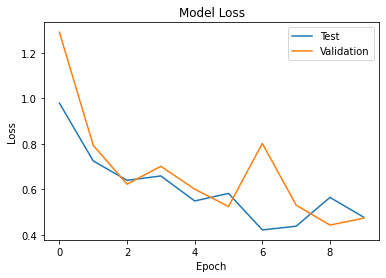

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

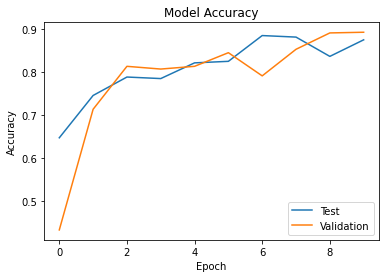

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

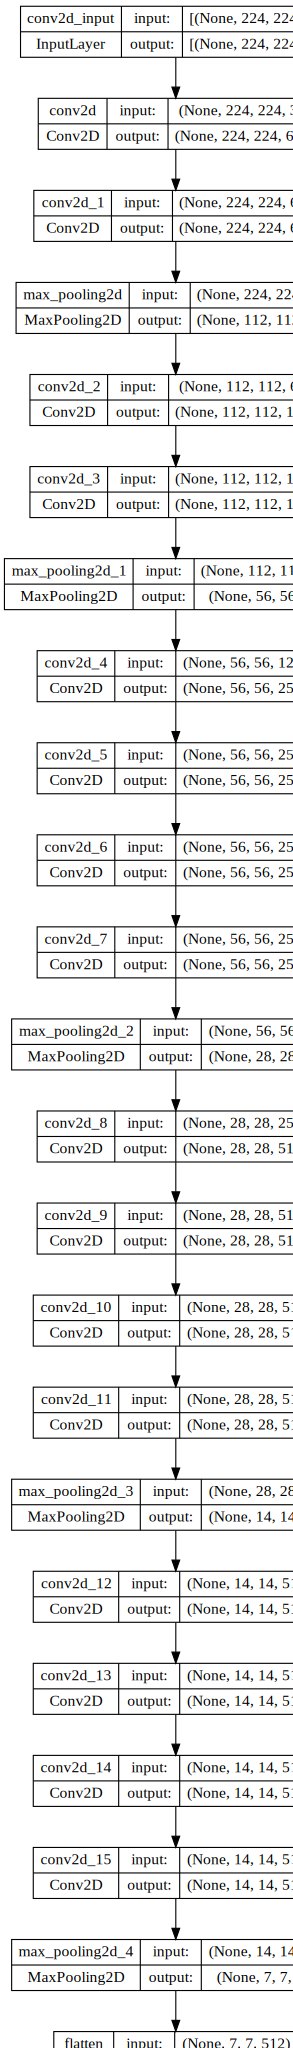

In [25]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB',expand_nested=False, dpi=60, subgraph=False).create(prog='dot',format='svg'))

Text(0, 0.5, 'True Positive Rate')

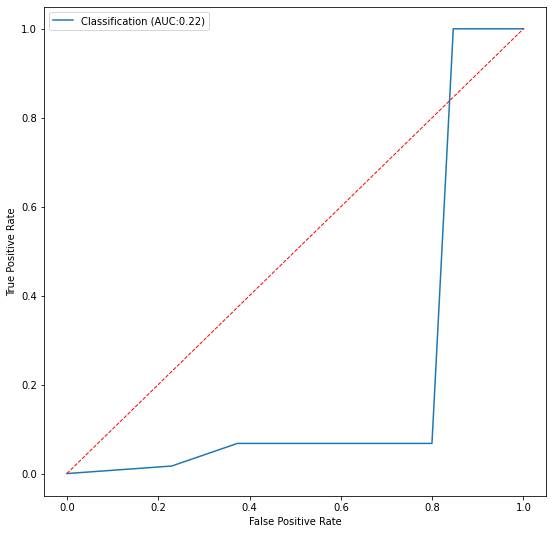

In [18]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score
from matplotlib.pyplot import figure

p_y = model.predict(x_test, verbose=False)
fpr, tpr, th = roc_curve(y_test.argmax(axis=1), p_y.argmax(axis=1), pos_label=1)
fig, c_ax = plt.subplots(1,1, figsize=(9, 9))
c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Classification', auc(fpr, tpr)))
c_ax.plot([0,1], [0,1], color='red', lw=1, linestyle='--')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

In [21]:
model.save("/content/drive/MyDrive/model_vgg19_3.h5")